### Wstęp do Uczenia Maszynowego 
##### Laboratorium 3

### 1. Kroswalidacja (*ang. cross validation*)

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

https://scikit-learn.org/stable/modules/cross_validation.html

### Zadanie 1
---------
Wymień zalety i wady kroswalidacji.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
pima = pd.read_csv("../lab2/pima.csv")

In [3]:
y = pima.Outcome
X = pima.drop(["Outcome"], axis = 1)

#### Zadanie 2
--------
Używając funkcji `cross_val_score()` oszacuj wartość średnią oraz odchylenie standardowe 10-krotnej kroswalidacji dla modelu drzewa.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2137)

In [6]:
Tree = tree.DecisionTreeClassifier()
scores = cross_val_score(Tree, X_train, y_train, cv=10)
scores

array([0.72222222, 0.68518519, 0.7037037 , 0.66666667, 0.64814815,
       0.72222222, 0.64814815, 0.69811321, 0.66037736, 0.69811321])

In [8]:
print(f"{np.round(scores.mean(), 3)} accoracy with {np.round(scores.std(), 3)} standard deviation")

0.685 accoracy with 0.027 standard deviation


### Zadanie 3
--------------------
Jaki jest stosunek obserwacji klasy 1 do klasy 0? Czy to powinno nas martwić? Czy możemy coś zrobić?

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

### Zadanie 4
---------
Przeprowadź na zbiorze danych `pima.csv` 100 razy 10-krotną kroswalidację i przestaw otrzymane wyniki (miara `roc_auc`) - średnią oraz odchylenie standardowe. Narysuj rozkład otrzymanych wyników.



In [9]:
scores_mean = []
scores_sd = []

Tree = tree.DecisionTreeClassifier()
for _ in range(100):
    scores_mean.append(cross_val_score(Tree, X_train, y_train, cv=10, scoring='roc_auc').mean())
    scores_sd.append(cross_val_score(Tree, X_train, y_train, cv=10, scoring='roc_auc').std())

### 2. Krzywa ROC

Jak się wylicza krzywą ROC?

### Zadanie 5
---------
Przygotuj model do oceny metodą `roc_auc`.


In [28]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

In [29]:
Tree1 = tree.DecisionTreeClassifier()
Tree2 = tree.DecisionTreeClassifier(max_depth=3)
Tree3 = tree.DecisionTreeClassifier(max_leaf_nodes=5)

In [30]:
Tree1.fit(X_train, y_train)
Tree2.fit(X_train, y_train)
Tree3.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

In [46]:
y_test_pred1 = Tree1.predict_proba(X_test)
y_test_pred2 = Tree2.predict_proba(X_test)
y_test_pred3 = Tree3.predict_proba(X_test)

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred1[:, 1])

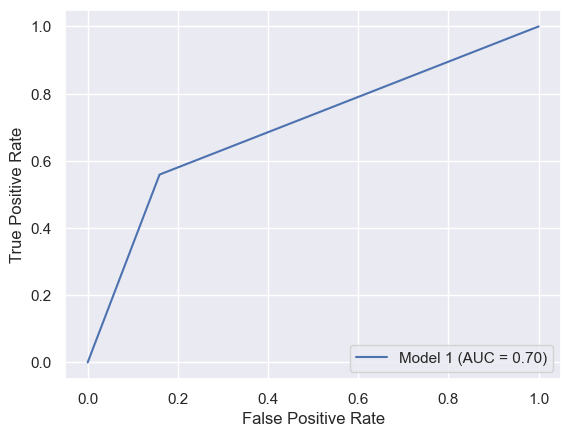

In [48]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Model 1')
display.plot()

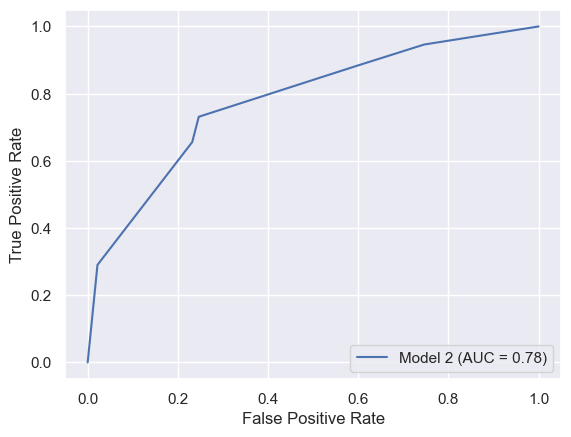

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred2[:, 1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Model 2')
display.plot()

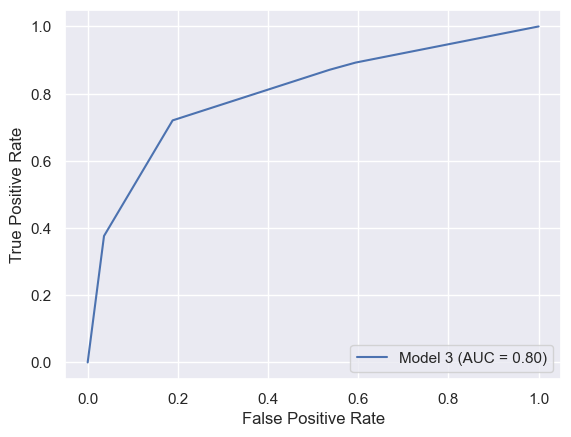

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred3[:, 1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Model 3')
display.plot()

### 3. Podsumowanie, czyli co warto wiedzieć...

1. Jak definiujemy problem klasyfikacji?
2. Podział zbioru na treningowy, walidacyjny i testowy.
2. Miary dokładności klasyfikatorów:

    a) macierz pomyłek (*ang. confusion matrix*),

    b) dokładność, czułość, precyzja, (*ang. accuracy, recall, precision*)

    c) krzywa ROC,

    d) AUC.


3. Kroswalidacja (*ang. cross validation*)
4. Drzewa decyzyjne:

    a) wady i zalety,

    b) jak budujemy drzewo,

    b) jakie mamy miary podziału,
    
    d) przycinanie drzew.